In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft,dct
from itertools import product

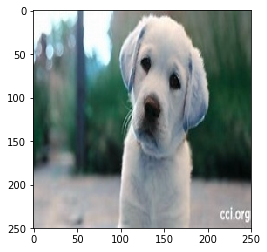

In [2]:
img=cv2.imread("C:/Users/Natasha/Desktop/ha.jpg")
plt.imshow(img)
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#plt.imshow(img)

In [3]:
height,width,channel=img.shape

In [4]:
def binary_value(val):
        binval = bin(val)[2:]
        while len(binval) < 8:
            binval = "0"+binval
        return binval

In [5]:
if height%8!=0:
    height=height+(8-(height%8))
if width%8!=0:
    width=width+(8-(width%8))
img=cv2.resize(img,(width,height))

(256, 256)


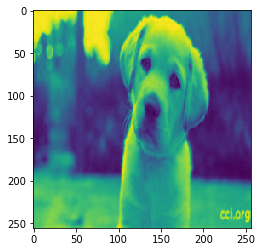

In [6]:
bimg=img[:,:,0]
gimg=img[:,:,1]
rimg=img[:,:,2]
plt.imshow(bimg)
k=(bimg.shape)
print(k)

In [7]:
secret="hi in this wonderful world"
print(len(secret))
bits=[]
for char in secret:
    binval=bin(ord(char))[2:].rjust(8,'0')
    bits.append(binval)
bitmess=bits
print(bitmess)
message=str(len(secret))+'*'+secret
print(message)

26
['01101000', '01101001', '00100000', '01101001', '01101110', '00100000', '01110100', '01101000', '01101001', '01110011', '00100000', '01110111', '01101111', '01101110', '01100100', '01100101', '01110010', '01100110', '01110101', '01101100', '00100000', '01110111', '01101111', '01110010', '01101100', '01100100']
26*hi in this wonderful world


In [8]:
messindex=0
letterindex=0

In [9]:

fin_img=np.zeros((k),np.uint8)

bimg=np.float32(bimg)
#print(bimg)
quant = np.array([[16,11,10,16,24,40,51,61],
                 [12,12,14,19,26,58,60,55],
                 [14,13,16,24,40,57,69,56],
                 [14,17,22,29,51,87,80,62],                    
                 [18,22,37,56,68,109,103,77],
                 [24,35,55,64,81,104,113,92],
                 [49,64,78,87,103,121,120,101],
                 [72,92,95,98,112,100,103,99]])


quantisedct=[]                 

x_blocks=width//8
y_blocks=height//8
if (x_blocks*y_blocks)<len(secret):
    print("message too long")
for x in range(0,x_blocks):
    for y in range(0,y_blocks):
        x_offset=x*8
        y_offset=y*8
        x_end=x_offset+8
        y_end=y_offset+8
        imgblocks=bimg[y_offset:y_end,x_offset:x_end]-128
        quantisedct=(cv2.dct(imgblocks))
        #print(quantisedct)
        for i in range(0,8):
            for j in range(0,8):
                    quantisedct[i][j]=(np.round(quantisedct[i][j]/quant[i][j] ))
                    #print(quantisedct[i][j])
        quantisedblock=quantisedct
        dc=quantisedblock[0][0]
        dc_list=[]
        n=(int(dc))
        #print(dc)
        if n<0:
            n=abs(n)
            bin1=binary_value(n)
            dc="1"+bin1[1:8]
        if n>=0:
            dc=bin(n)[2:].rjust(8,'0')
        dc=str(dc)
        for i in dc:
            dc_list.append(i)
            #print(dc_list)
        if messindex<len(message) and letterindex<8:
            # print(messindex,end='')
            # print("+",end='')
            # print(letterindex)
            dc_list[7]=bitmess[messindex][letterindex]
            #print(dc_list[7])
            # when printing this list the result is fine

            letterindex+=1
            if letterindex==8:
                letterindex=0
                messindex+=1         
            makeitastring = ''.join(map(str, dc_list))
            #print(makeitastring)
            dc=int(makeitastring,2)
            print(dc)
            dc=np.float32(dc)
            #print(dc)
            quantisedblock[0][0]=dc
            # print(simgblocks)
            # in quantisedblock:
            #simgblocks=cv2.idct(quantisedblock)+128
            #print(quantisedblock[0][0])
        for i in range(0,8):
            for j in range(0,8):
                quantisedblock[i][j]=np.round(quantisedblock[i][j]*quant[i][j])
                #print(quantisedblock)
        simgblocks=cv2.idct(quantisedblock)
        simgblocks=simgblocks+128
        newblock=np.round(simgblocks)

        #print(simgblocks)
        #print(newblock)
        fin_img[y_offset:y_end,x_offset:x_end]=newblock
        #print(fin_img)
plt.imshow(fin_img)

62
63
61
60
47
28
16
0
20
21
27
40
47
46
46
51
54
56
59
56
50
44
42
14
12
25
31
28
21
24
28
29
62
63
61
30
9
5
7
10
12
10
19
30
36
42
46
48
50
55
53
51
42
43
34
4
14
23
29
26
21
28
32
32
60
57
49
26
7
24
24
3
0
1
3
11
16
22
25
25
34
34
29
32
26
18
10
0
12
23
27
29
28
37
39
39
60
51
27
6
3
13
3
23
16
1
9
2
9
13
11
10
20
23
15
18
14
3
2
4
6
21
25
32
36
37
34
39
58
35
1
5
6
2
3
12
12
9
1
4
10
15
21
24
28
29
23
29
20
9
8
3
8
23
27
28
31
33
26
32
58
32
7
2
6
4
6
10
12
15
15
13
16
25
31
33
36
43
45
46
37
3
1
21
4
19
25
25
22
28
29
22
22
5
13
18
19
19
24
28
32
33
33
34
38
41
42
44


IndexError: list index out of range

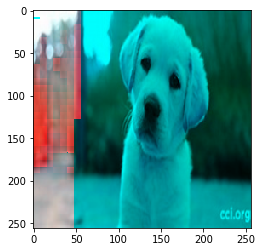

In [10]:
nfin_img=np.zeros((img.shape),np.uint8)
nfin_img[:,:,0]=fin_img
nfin_img[:,:,1]=gimg
nfin_img[:,:,2]=rimg

#print(nfin_img)
plt.imshow(nfin_img)


[[254 254 254 ...   0   0   0]
 [253 253 253 ...   0   0   0]
 [251 251 251 ...   0   0   0]
 ...
 [183 183 184 ...   0   0   0]
 [185 185 186 ...   0   0   0]
 [186 187 187 ...   0   0   0]]


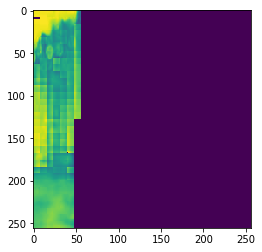

In [11]:
newbimg=nfin_img[:,:,0]
newgimg=nfin_img[:,:,1]
newrimg=nfin_img[:,:,2]
plt.imshow(newbimg)
print(newbimg)

In [12]:
messSize=None


In [13]:
secretlist=[]
newbimg=np.float32(newbimg)
#print(width, height)
new_x_blocks=width//8
new_y_blocks=height//8
for x in range(0,new_x_blocks):
    for y in range(0,new_y_blocks):
        newx_offset=x*8
        newy_offset=y*8
        newx_end=newx_offset+8
        newy_end=newy_offset+8
        newimgblocks=newbimg[newy_offset:newy_end,newx_offset:newx_end]-128
        newdctblocks=np.round(cv2.dct(newimgblocks))
        #print(newimgblocks)
        for i in range(0,8):
             for j in range(0,8):
                    quantisedct[i][j]=(np.round(newdctblocks[i][j]/quant[i][j]))
                #print(quantisedct)
        newquantisedblock=quantisedct
        newdc=newquantisedblock[0][0]
        
        print(newdc)
        newdc_list=[]
        #dc=uint(8)
        n=(int(newdc))
        if n>=0:
            newdc=bin(n)[2:].rjust(8,'0')
       # print(dc)
        if n<0:
            n=abs(n)
            bin1=binary_value(n)
            newdc="1"+bin1[1:8]
        newdc=str(newdc)
        #print(newdc)
      
        for i in newdc:
            newdc_list.append(i)
        a = ''.join(map(str, newdc_list))
     
        secret_element=a[7]
        #print(a)
       
        
        secretlist.append(secret_element)
        #print(secret_element)
        




62.0
31.0
61.0
60.0
47.0
28.0
16.0
0.0
20.0
21.0
27.0
40.0
47.0
46.0
46.0
51.0
54.0
56.0
59.0
56.0
50.0
44.0
42.0
14.0
12.0
25.0
31.0
28.0
21.0
24.0
28.0
29.0
62.0
63.0
61.0
30.0
9.0
5.0
7.0
10.0
12.0
10.0
19.0
30.0
36.0
42.0
46.0
48.0
50.0
55.0
53.0
51.0
42.0
43.0
34.0
4.0
14.0
23.0
29.0
26.0
21.0
28.0
32.0
32.0
60.0
57.0
43.0
26.0
7.0
24.0
24.0
3.0
0.0
1.0
3.0
11.0
16.0
22.0
25.0
25.0
34.0
34.0
29.0
32.0
26.0
18.0
10.0
0.0
12.0
23.0
27.0
29.0
28.0
37.0
39.0
39.0
60.0
51.0
27.0
6.0
3.0
13.0
3.0
23.0
16.0
1.0
9.0
2.0
9.0
13.0
11.0
10.0
20.0
23.0
15.0
18.0
14.0
3.0
2.0
4.0
6.0
21.0
25.0
32.0
36.0
37.0
34.0
39.0
58.0
35.0
1.0
5.0
6.0
2.0
3.0
12.0
12.0
9.0
1.0
4.0
10.0
15.0
21.0
24.0
28.0
29.0
23.0
29.0
20.0
9.0
8.0
3.0
8.0
23.0
27.0
28.0
31.0
33.0
26.0
32.0
58.0
32.0
7.0
2.0
6.0
4.0
6.0
10.0
12.0
15.0
15.0
13.0
16.0
25.0
31.0
33.0
36.0
43.0
45.0
46.0
35.0
3.0
1.0
21.0
4.0
19.0
25.0
25.0
22.0
28.0
29.0
22.0
22.0
5.0
13.0
18.0
19.0
19.0
24.0
28.0
32.0
33.0
33.0
34.0
38.0
41.0
42.0
44.0
-64

In [14]:
myarray=np.array(secretlist)
#print(np.resize(myarray,(0,new_x_blocks*new_y_blocks)))
print(myarray)
#print(myarray[0:new_x_blocks*new_y_blocks])
b=[]

['0' '1' '1' ... '0' '0' '0']


In [15]:
index=0
b=[]
k=''
def binToDec(binNum):
    decNum = 0
    power = 0
    while binNum>0:
        decNum += 2 **power* (binNum%10)
        binNum //=10
        power += 1
    return decNum

In [16]:
for i in secretlist:
    k=k+i
    index+=1
    if index%8==0:
        b.append(k)
        k=''
#print(b) 
for i in b:
    k=int(i)
    #print(k)
    k=binToDec(k)
    print(chr(k))

h
i
 
i
n
 
t
h
i
s
 
w
o
n
d
e
r
f
u
l
 
w
o
r
l
d
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [ ]:



# for i in secretlist:
#    # b=map(str,i)
#    # b=''.join(myarray[i*8:(i+1)*8])
#    # b= ''.join(map(str, myarray[i*8:(i+1)*8]))
#     k=myarray[i]
#     b=int(b,2)
    
#     print(chr(b))
   
# for index,secretlist in enumerate(secretlist):
#     print(index, item)
#     k=''  
#     k=k+i
#     if 
   

In [ ]:

# type(bimg)
# newimg=cv2.merge((blank_img,gimg,rimg))

# plt.imshow(newimg)
# height,width,channel=newimg.shape
# print(height,width)

In [ ]:
#fin_img=np.ones((184,280,3),np.uint8)
# fin_img=fin_img+255
# print(fin_img)
# plt.imshow(fin_img)

In [ ]:
# for i in (0,184):
#     for j in (0,280):
#         fin_img=fin_img+255
# #print(fin_img)
# plt.imshow(fin_img)